In this task, we invite you to train 2 models on a selected Data Set that
should predict the class column. The models are the following:
• Let’s, of course, start with importing the Data Set.
• The next thing you will do is create a visualization of the algorithm’s
decision boundaries to understand better how it works.
- Choose 2 features of the Data Set with the highest absolute correlation with the target.
- Create the decision boundary graph of these features related to
the target.
- Comment on the result that you got.
PS: More about decision boundary you can find here:
(https://bit.ly/3U7ICc7)
• Decision trees have a lot of hyperparameters. Let’s explore how they
influence the accuracy of the model. For every hyperparameter in this
list, create a line plot where on the X-axis are hyperparameter values and
on the Y-axis is the accuracy of the model for different hyperparameter
settings:
- max depth
- min samples split
- min samples leaf
- min weight fraction leaf
- max features
- max leaf nodes
- min impurity decrease
P.S. Always set random state the same.
• Comment on the impact of every hyperparameter on the model’s
accuracy.
• Train a model with the best set of hyperparameters, then export
the tree’s structure.


About dataset target column survaival

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from matplotlib.colors import ListedColormap

In [5]:
titanic = sns.load_dataset("titanic")
df = titanic.copy()

In [6]:
#Предобработка
df = df[["survived", "pclass", "sex", "age", "sibsp", "parch", "fare"]].dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [7]:
#Корреляция
corr = df.corr(numeric_only=True)['survived'].abs().sort_values(ascending=False)
top_features = corr.index[1:3] #потому что значение ноль это колонка таргет
print("Top correlated features:", top_features.tolist())

X = df[top_features].values
y = df['survived'].values

Top correlated features: ['sex', 'pclass']


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

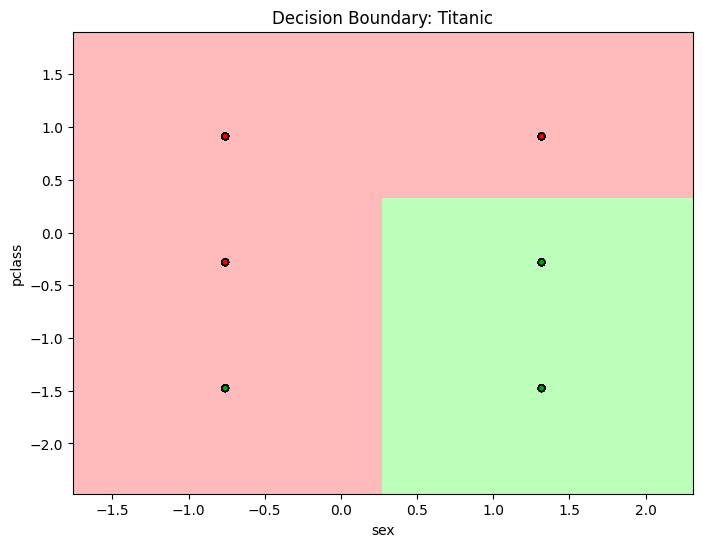

In [9]:
# Обучение и визуализация границы решений
def plot_decision_boundary(X, y, model, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB'])
    cmap_bold = ListedColormap(['#FF0000', '#00AA00'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlabel(top_features[0])
    plt.ylabel(top_features[1])
    plt.title(title)
    plt.show()

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_scaled, y)
plot_decision_boundary(X_scaled, y, clf, "Decision Boundary: Titanic")

Здесь мы видим, как колонка с полом,

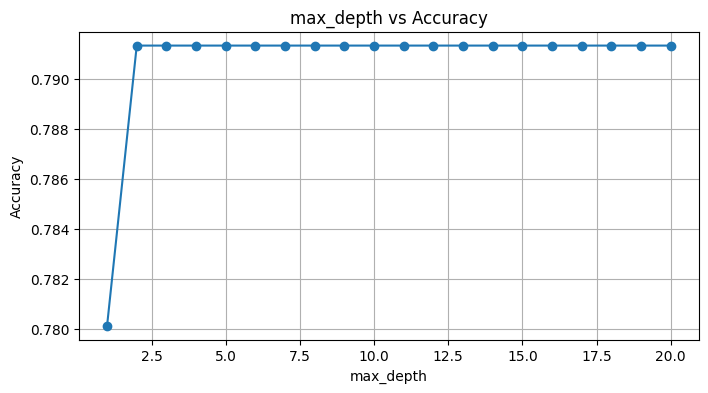

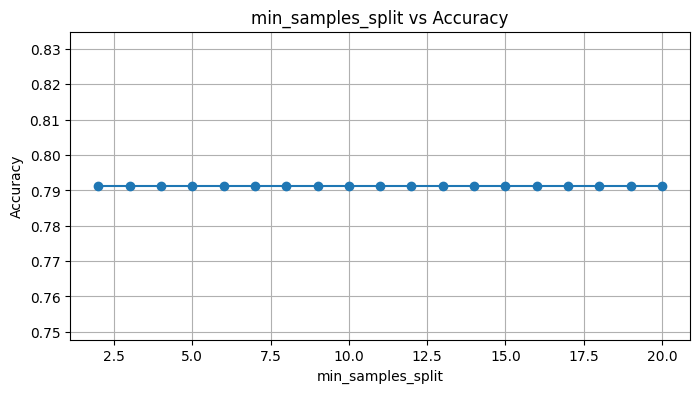

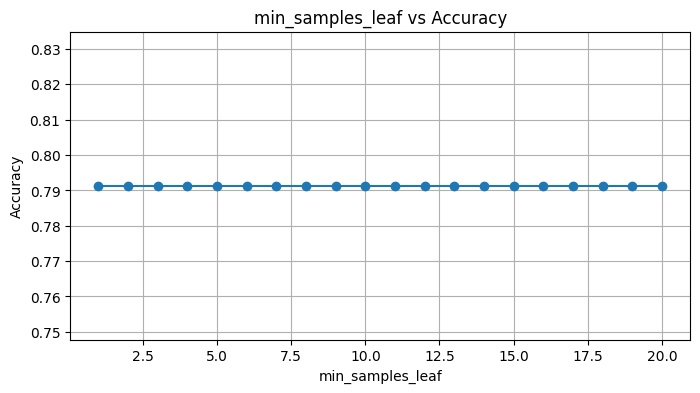

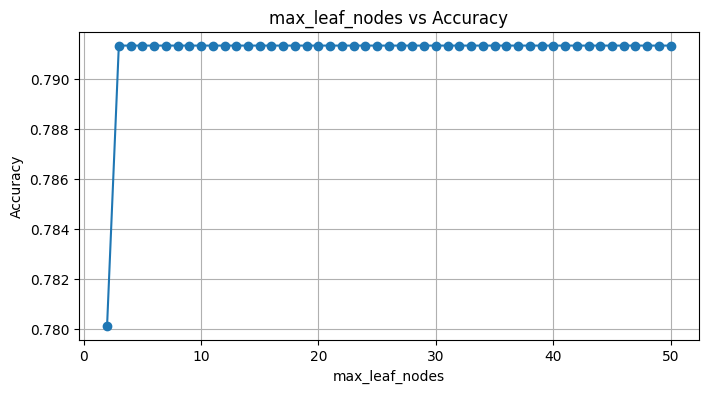

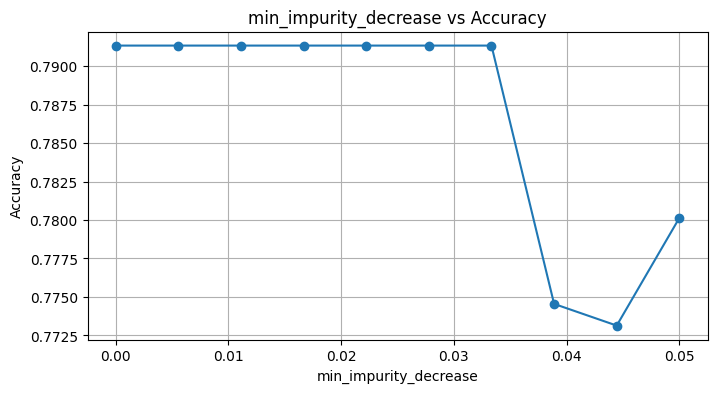

In [10]:
#Графики влияния гиперпараметров
def plot_param_curve(param_name, param_range):
    scores = []
    for val in param_range:
        kwargs = {param_name: val}
        model = DecisionTreeClassifier(random_state=42, **kwargs)
        acc = cross_val_score(model, X_scaled, y, cv=5).mean()
        scores.append(acc)
    plt.figure(figsize=(8, 4))
    plt.plot(param_range, scores, marker='o')
    plt.title(f'{param_name} vs Accuracy')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

plot_param_curve('max_depth', range(1, 21))
plot_param_curve('min_samples_split', range(2, 21))
plot_param_curve('min_samples_leaf', range(1, 21))
plot_param_curve('max_leaf_nodes', range(2, 51))
plot_param_curve('min_impurity_decrease', np.linspace(0.0, 0.05, 10))

Мы видим здесь анализ глубины дерева, там где график выше не зватает глубины значит вывод будут недостаоточно точными и поверзностными

Та где график посередине, это самый лучший вариант

Там где график ниду всего, модет обожначать переобучение


Так же там проскаль0зываеют такие факторы как min leaf nodes  жто значит, что там мало выводов, или например в другом графике мало факторов

In [11]:
#Финальная модель и экспорт дерева
final_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    max_leaf_nodes=12,
    random_state=42
)
final_model.fit(X_scaled, y)
print(export_text(final_model, feature_names=top_features.tolist()))


|--- sex <= 0.28
|   |--- pclass <= -0.88
|   |   |--- class: 0
|   |--- pclass >  -0.88
|   |   |--- pclass <= 0.31
|   |   |   |--- class: 0
|   |   |--- pclass >  0.31
|   |   |   |--- class: 0
|--- sex >  0.28
|   |--- pclass <= 0.31
|   |   |--- pclass <= -0.88
|   |   |   |--- class: 1
|   |   |--- pclass >  -0.88
|   |   |   |--- class: 1
|   |--- pclass >  0.31
|   |   |--- class: 0



НАчинаем с пола, значения были преобразованны, то есть мы вилим, что первое значение это женщина, потом класс, потом значение выжила ли она или нет

# **Вывод**

Древо решений это как пример, в титанике один из признаков это разделение по полу, мы видим большую корреляцию, древо решений говорит, ага, значит это влияет на дальнейшее пресказание значит это оформляется в ветку, потом добавляется еще признак пока не доззодит до финального момента, когда древо решений виит, что признаков больше нет, а в этой группе все выйрали
